# Clustering

Se trata de una técnica de aprendizaje automático **no supervisado**, es decir, no tenemos el vector del atributo objetivo o *target*. Vamos a agrupar los elementos en varios *clusters*.

Usaremos el algoritmo *K-Means* para realizar una segmentación de datos de clientes.

## Algoritmo K-Means

Este algoritmo agrupa datos similares.

*K-Means* se compone de los siguientes pasos:

1. Se establecen los centroides de cada grupo. Pueden ser aleatorios o se pueden introducir directamente. El número de centroides debe ser el mismo que el número de grupos que queremos conseguir.

2. Cada caso (cada punto de la gráfica) se asigna al centroide que le pilla más cerca.

3. Cuando todos los casos pertenecen a algún grupo se calculan los nuevos centroides con la media de todos los casos de cada grupo. Se vuelve al paso 2 mientras los centroides vayan cambiando. (Si no cambian quiere decir que ya tendríamos los datos agrupados)



## Importación de paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga de datos

In [6]:
customers = pd.read_csv("/content/customers.csv")

## Exploración y visualización de datos

In [8]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Tenemos los siguientes campos:
- `CustomerID`
- `Gender`
- `Age`
- `Annual Income (K$)`
- `Spending Score (1-100)`

In [10]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


No nos interesa el código de cliente, no aporta ninguna información relevante.

In [11]:
customers = customers.drop("CustomerID", axis=1)

Veamos la distribución por sexo. Creamos una gráfica donde se vean cuántos hombres y cuántas mujeres hay.

<ipython-input-18-ad9e294b1a07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=customers, palette="rocket")


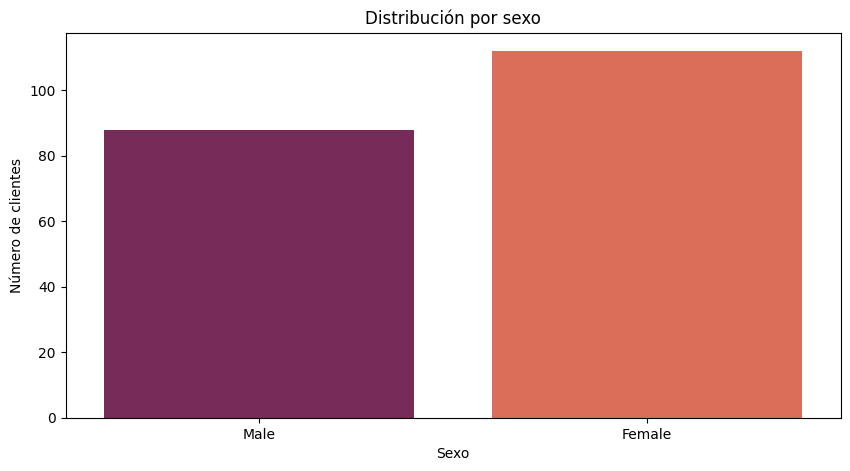

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender", data=customers, palette="rocket")
plt.xlabel("Sexo")
plt.ylabel("Número de clientes")
plt.title("Distribución por sexo")
plt.show()

## Correlaciones

Vamos a ver las correlaciones entre los distintos atributos, separados por sexo.

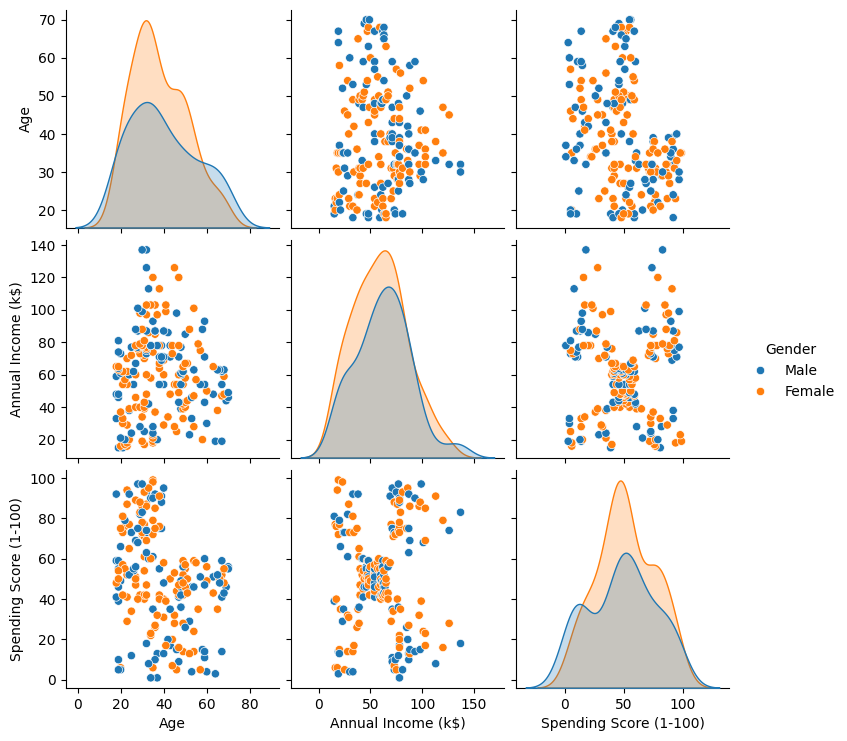

In [21]:
sns.pairplot(customers, hue="Gender", height=4)
plt.show()

El índice de gasto respecto a los ingresos muestra un patrón extraño.

Vamos a mostrar diagramas de cajas y bigotes para el índice de gastos y para los ingresos anuales.

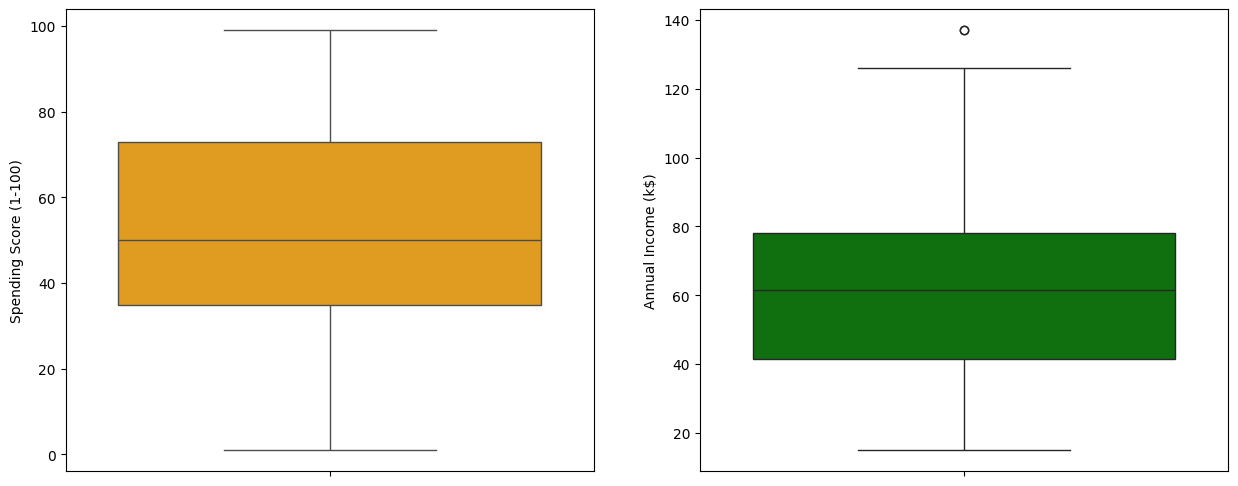

In [24]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=customers["Spending Score (1-100)"], color="orange")
plt.subplot(1, 2, 2)
sns.boxplot(y=customers["Annual Income (k$)"], color="green")
plt.show()

Vamos a representar mediante una gráfica en 3D los 3 valores numéricos.

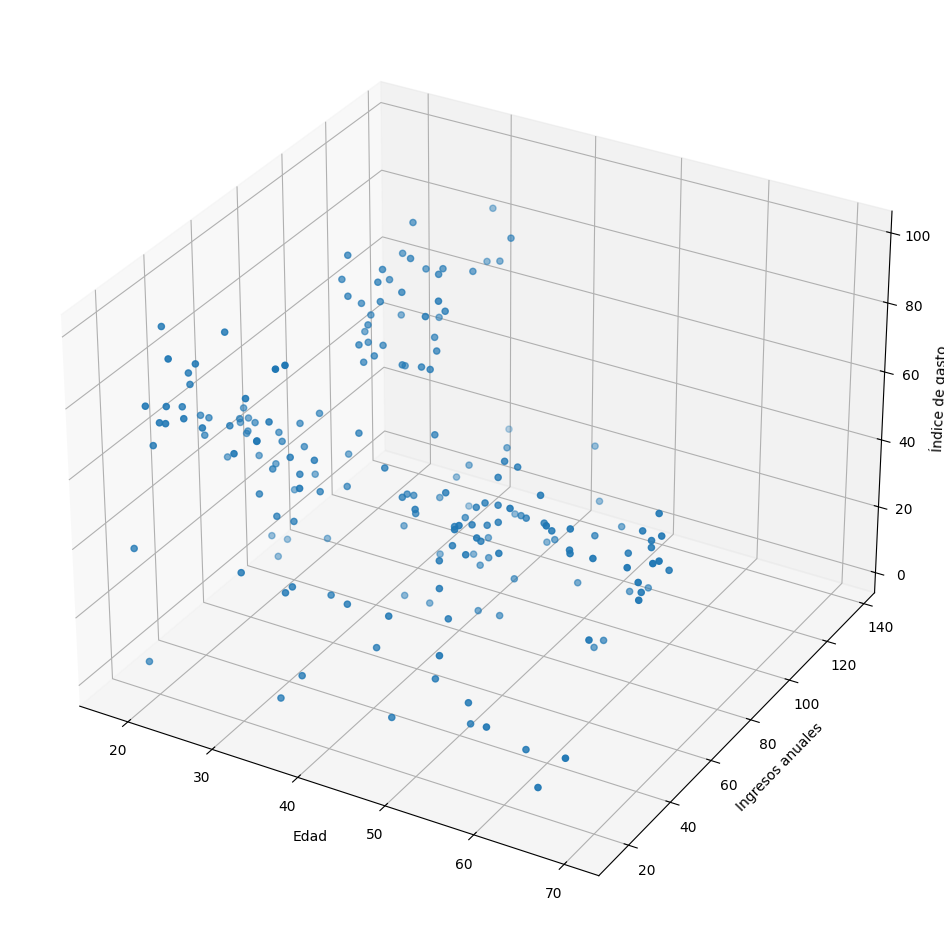

In [25]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

x = customers["Age"]
y = customers["Annual Income (k$)"]
z = customers["Spending Score (1-100)"]

ax.set_xlabel("Edad")
ax.set_ylabel("Ingresos anuales")
ax.set_zlabel("Índice de gasto")

ax.scatter(x, y, z)
plt.show()

In [28]:
# Gráfica en 3D interactiva
import plotly.express as px

fig = px.scatter_3d(customers, x="Age", y="Annual Income (k$)", z="Spending Score (1-100)", color="Gender", width=800, height=500)
fig.update_traces(marker_size=4) # Tamaño de los puntos
fig.show()

## Aplicación de *K-Means* para hacer el clustering

In [29]:
from sklearn.cluster import KMeans

customers_model = KMeans(n_clusters=5)

clusters = customers_model.fit_predict(customers.drop("Gender", axis=1))

In [30]:
clusters

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

Creamos un atributo nuevo que va a indicar a qué grupo pertenece cada instancia.

In [31]:
customers["groups"] = clusters

In [32]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),groups
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


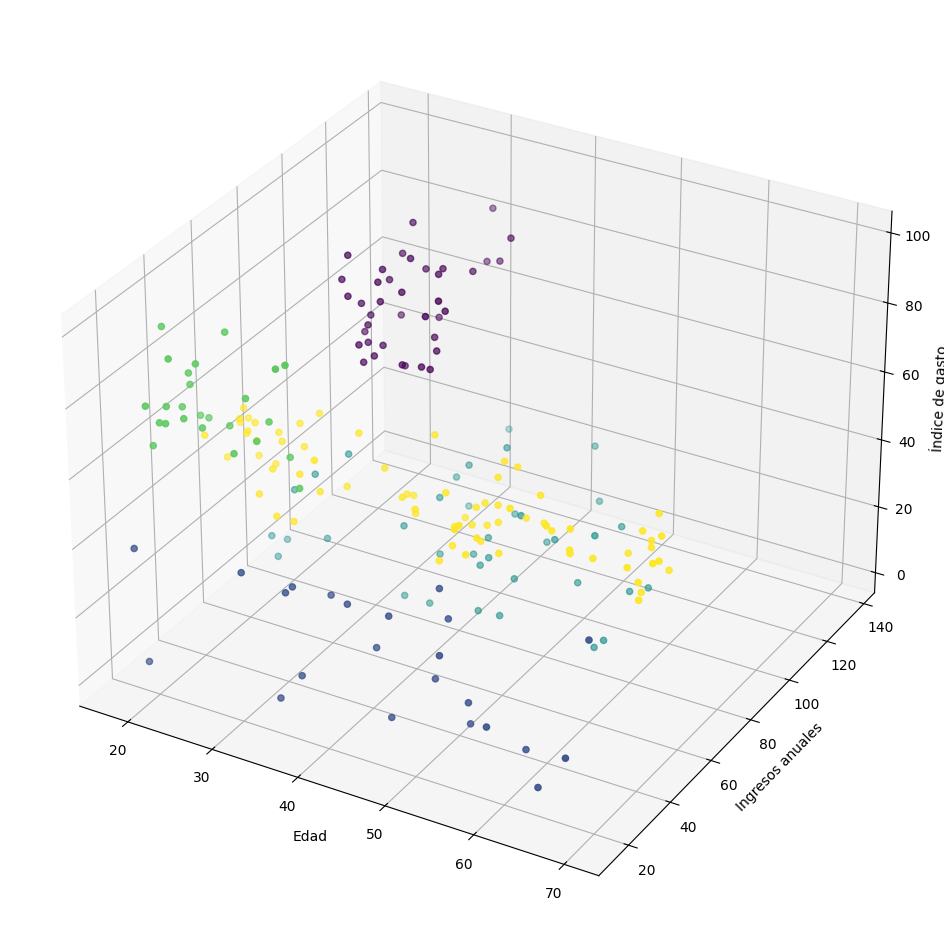

In [37]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")

x = customers["Age"]
y = customers["Annual Income (k$)"]
z = customers["Spending Score (1-100)"]

ax.set_xlabel("Edad")
ax.set_ylabel("Ingresos anuales")
ax.set_zlabel("Índice de gasto")

ax.scatter(x, y, z, c=customers["groups"])
plt.show()

In [39]:
# Gráfica en 3D interactiva
import plotly.express as px

fig = px.scatter_3d(customers,
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",
                    color="groups",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    template="plotly_dark",
                    size="Annual Income (k$)",
                    size_max=15,
                    title="Agrupación de clientes",
                    labels={"Age": "Edad",
                            "Annual Income (k$)": "Ingreso Anual (k$)",
                            "Spending Score (1-100)": "Índice de gasto (1-100)",
                            "groups": "Grupo"},
                    width=1000,
                    height=600,
                    opacity=0.8)

# Agrega un borde oscuro a los puntos para resaltarlos
fig.update_traces(marker=dict(line=dict(width=2, color="DarkSlateGrey")))

fig.show()